In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/megawatts.csv')

In [ ]:
fest = pd.read_csv('/content/drive/My Drive/festival.csv')

In [ ]:
import sys
sys.path.append('/content/drive/My Drive')

import backend
sys.path = sys.path[:-1]

In [ ]:
window = [-1, -2, -3, 0, 1, 2, 3]
d_number = 12
w_number = 12
new_df = backend.mach3(df, fest, window, d_number, w_number)
new_df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/panda

,load_(t-93),load_(t-94),load_(t-95),load_(t-96),load_(t-97),load_(t-98),load_(t-99),load_(t-189),load_(t-190),load_(t-191),load_(t-192),load_(t-193),load_(t-194),load_(t-195),load_(t-285),load_(t-286),load_(t-287),load_(t-288),load_(t-289),load_(t-290),load_(t-291),load_(t-381),load_(t-382),load_(t-383),load_(t-384),load_(t-385),load_(t-386),load_(t-387),load_(t-477),load_(t-478),load_(t-479),load_(t-480),load_(t-481),load_(t-482),load_(t-483),load_(t-573),load_(t-574),load_(t-575),load_(t-576),load_(t-577),...,t-w46,t-w47,t-w48,t-w49,t-w50,t-w51,t-w52,t-w53,t-w54,t-w55,t-w56,t-w57,t-w58,t-w59,t-w60,t-w61,t-w62,t-w63,t-w64,t-w65,t-w66,t-w67,t-w68,t-w69,t-w70,t-w71,t-w72,t-w73,t-w74,t-w75,t-w76,t-w77,t-w78,t-w79,t-w80,t-w81,t-w82,t-w83,t-w84,load
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-05 04:30:00,346.864,350.032,351.332,347.788,351.428,349.536,349.896,335.104,335.748,332.464,328.072,328.828,333.904,339.092,322.656,322.952,321.696,319.752,322.908,320.804,321.060,325.432,321.392,318.148,317.948,323.548,319.684,322.928,318.120,316.336,306.956,308.704,301.164,299.888,304.128,335.356,331.724,329.928,325.672,326.976,...,347.167976,346.882888,345.992704,346.728704,394.388348,387.979608,388.319984,381.826888,386.167244,383.773064,385.803608,329.262528,327.761444,328.654536,327.511256,329.294528,331.121436,329.957804,320.808712,319.487980,318.085808,315.607260,312.756340,311.930164,313.797796,331.456,326.220,328.516,329.316,321.612,318.848,318.068,338.847988,333.605808,337.274172,328.098896,321.192712,321.274168,318.874172,338.420
2016-12-05 04:45:00,350.568,346.864,350.032,351.332,347.788,351.428,349.536,332.316,335.104,335.748,332.464,328.072,328.828,333.904,327.992,322.656,322.952,321.696,319.752,322.908,320.804,332.096,325.432,321.392,318.148,317.948,323.548,319.684,317.376,318.120,316.336,306.956,308.704,301.164,299.888,334.464,335.356,331.724,329.928,325.672,...,345.236348,347.167976,346.882888,345.992704,397.480708,394.388348,387.979608,388.319984,381.826888,386.167244,383.773064,332.317076,329.262528,327.761444,328.654536,327.511256,329.294528,331.121436,322.658892,320.808712,319.487980,318.085808,315.607260,312.756340,311.930164,332.496,331.456,326.220,328.516,329.316,321.612,318.848,342.868356,338.847988,333.605808,337.274172,328.098896,321.192712,321.274168,336.284
2016-12-05 05:00:00,354.116,350.568,346.864,350.032,351.332,347.788,351.428,342.168,332.316,335.104,335.748,332.464,328.072,328.828,336.688,327.992,322.656,322.952,321.696,319.752,322.908,339.668,332.096,325.432,321.392,318.148,317.948,323.548,325.904,317.376,318.120,316.336,306.956,308.704,301.164,336.252,334.464,335.356,331.724,329.928,...,347.729428,345.236348,347.167976,346.882888,401.966520,397.480708,394.388348,387.979608,388.319984,381.826888,386.167244,346.821808,332.317076,329.262528,327.761444,328.654536,327.511256,329.294528,334.493068,322.658892,320.808712,319.487980,318.085808,315.607260,312.756340,343.760,332.496,331.456,326.220,328.516,329.316,321.612,345.335272,342.868356,338.847988,333.605808,337.274172,328.098896,321.192712,338.324
2016-12-05 05:15:00,369.824,354.116,350.568,346.864,350.032,351.332,347.788,358.516,342.168,332.316,335.104,335.748,332.464,328.072,349.636,336.688,327.992,322.656,322.952,321.696,319.752,365.696,339.668,332.096,325.432,321.392,318.148,317.948,345.240,325.904,317.376,318.120,316.336,306.956,308.704,353.872,336.252,334.464,335.356,331.724,...,349.311984,347.729428,345.236348,347.167976,415.860340,401.966520,397.480708,394.388348,387.979608,388.319984,381.826888,367.359984,346.821808,332.317076,329.262528,327.761444,328.654536,327.511256,343.150532,334.493068,322.658892,320.808712,319.487980,318.085808,315.607260,351.344,343.760,332.496,331.456,326.220,328.516,329.316,362.050900,345.335272,342.868356,338.847988,333.605808,337.274172,328.098896,339.488
2016-12-05 05:30:00,356.284,369.824,354.116,350.568,346.864,350.032,351.332,357.288,358.516,342.168,332.316,335.1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(new_df)

In [ ]:
scaled_data.shape

(107400, 169)

In [ ]:
train_data = scaled_data[:-30*96]
test_data = scaled_data[-30*96:]

In [ ]:

X_train = train_data[:, :-1]
Y_train = train_data[:, -1]

X_test = test_data[:, :-1]
Y_test = test_data[:, -1]

In [ ]:
X_train.shape

(104520, 168)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 6, 7, 4)
X_test = X_test.reshape(X_test.shape[0], 6, 7, 4)

In [ ]:
from sklearn.model_selection import train_test_split

X1, X2, Y1, Y2 = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, concatenate, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
  input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))

  conv1a = Conv2D(filters = 4, kernel_size = (1, 1), padding='same', activation='relu')(input)
  conv1b = Conv2D(filters = 4, kernel_size = (1, 3), padding='same', activation='relu')(input)
  conv1c = Conv2D(filters = 4, kernel_size = (1, 5), padding='same', activation='relu')(input)
  conv1d = Conv2D(filters = 2, kernel_size = (3, 3), padding='same', activation='relu')(input)
  conv1e = Conv2D(filters = 1, kernel_size = (5, 5), padding='same', activation='relu')(input)
  conv1f = Conv2D(filters = 1, kernel_size = (3, 5), padding='same', activation='relu')(input)
  conv1g = Conv2D(filters = 1, kernel_size = (5, 3), padding='same', activation='relu')(input)
  conv1h = Conv2D(filters = 4, kernel_size = (5, 1), padding='same', activation='relu')(input)
  conv1i = Conv2D(filters = 4, kernel_size = (3, 1), padding='same', activation='relu')(input)

  merged = concatenate([conv1a, conv1b, conv1c, conv1d, conv1e, conv1f, conv1g, conv1h, conv1i], axis=-1)
  norm1 = BatchNormalization()(merged)

  conv2 = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu')(norm1)
  norm2 = BatchNormalization()(conv2)

  conv3 = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu')(norm2)
  norm3 = BatchNormalization()(conv3)

  conv4 = Conv2D(filters = 16, kernel_size = (2, 2), activation='relu')(norm3)
  norm4 = BatchNormalization()(conv4)

  conv5 = Conv2D(filters = 8, kernel_size = (1, 2), activation='relu')(norm4)
  norm5 = BatchNormalization()(conv5)

  flatten = Flatten()(norm5)

  output = Dense(1, activation='relu')(flatten)

  model = Model(input, output)

  model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6, 7, 4)]    0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 6, 7, 4)      20          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 6, 7, 4)      52          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 6, 7, 4)      84          input_2[0][0]                    
____________________________________________________________________________________________

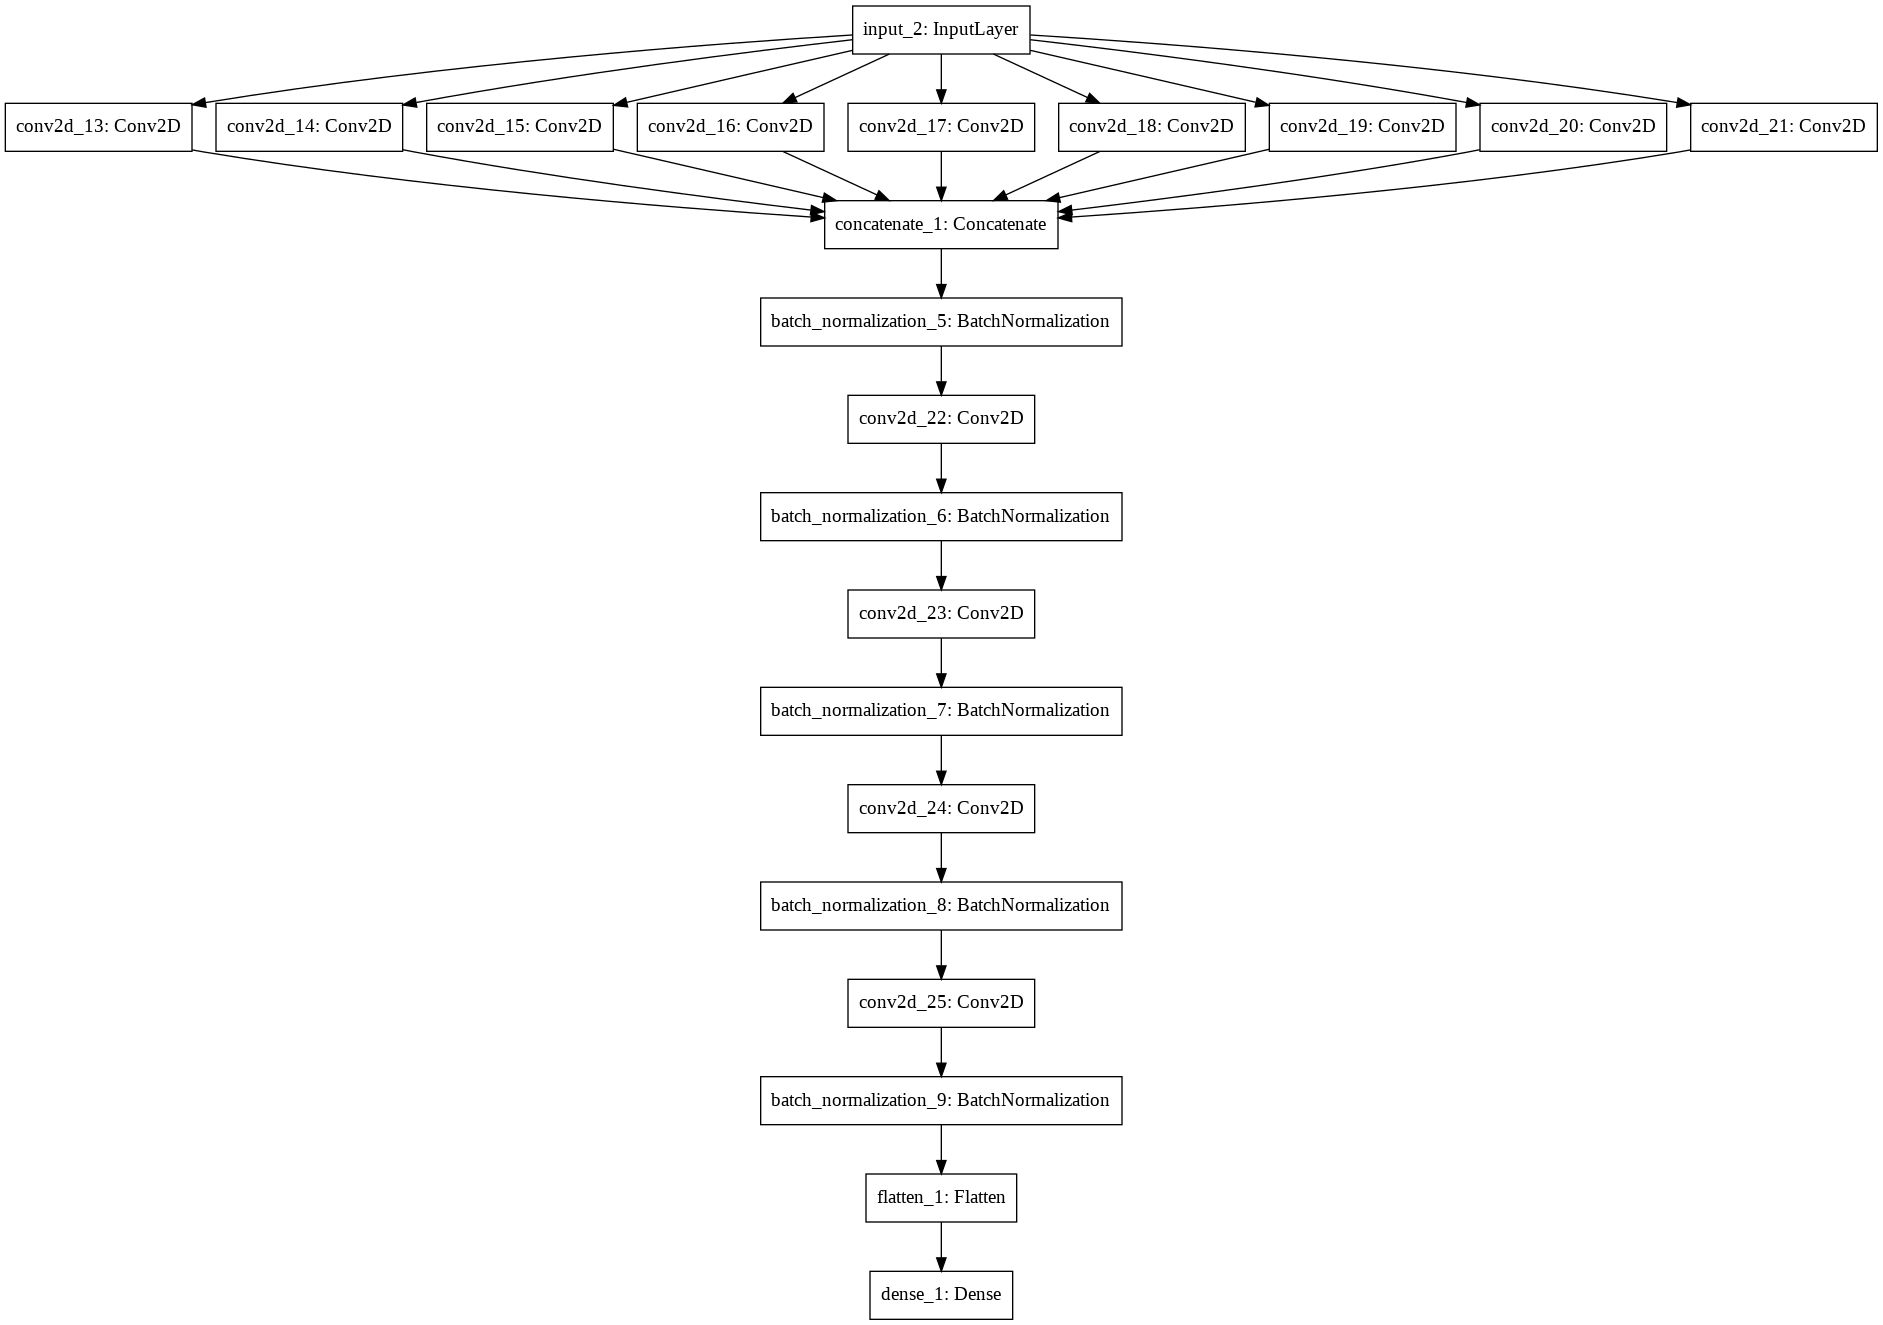

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
save_at = "/content/drive/My Drive/cnn_mach_3.hdf5"
save_best = ModelCheckpoint(save_at, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/sE19_R83.hdf5')

In [ ]:
model.compile(optimizer=Adam(0.0001), loss='mean_squared_error')

history = model.fit( X1, Y1, 
                    epochs = 1, batch_size = 32, 
                    callbacks=[save_best], verbose=1, 
                    validation_data = (X2, Y2))


Train on 88842 samples, validate on 15678 samples
88672/88842 [============================>.] - ETA: 0s - loss: 0.0023
Epoch 00001: val_loss improved from 0.00187 to 0.00186, saving model to /content/drive/My Drive/cnn_mach_3.hdf5
88842/88842 [==============================] - 60s 673us/sample - loss: 0.0023 - val_loss: 0.0019


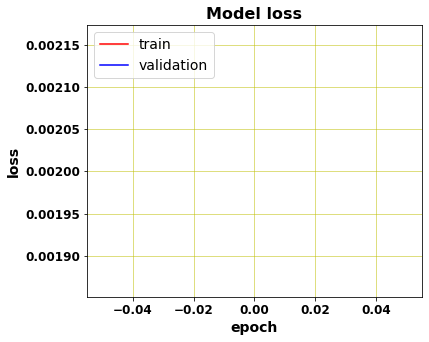

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss', weight='bold', fontsize=16)
plt.ylabel('loss', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train', 'validation'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/cnn_mach_3.hdf5')

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
target_scaler = MinMaxScaler()

target_scaler.fit(np.array(new_df.iloc[:, 0]).reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
ypred = target_scaler.inverse_transform(Y_pred)

In [ ]:
ytest = target_scaler.inverse_transform(Y_test.reshape(-1, 1))

In [ ]:
index= pd.date_range('12-01-2019 00:00', periods=30*96, freq='15min')

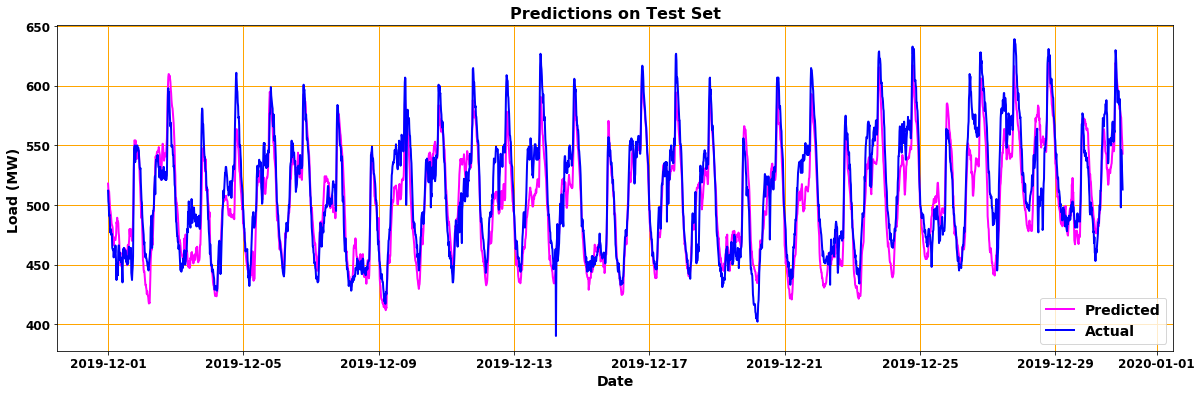

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 6))
plt.plot(pd.DataFrame(ypred).set_index(index), color='magenta', linewidth=2, label='Predicted')
plt.plot(pd.DataFrame(ytest).set_index(index), color='blue', linewidth=2, label='Actual')

plt.xticks(weight='bold', fontsize=12)

plt.yticks(weight='bold', fontsize=12)

plt.grid(color='orange', linewidth=1)

plt.title('Predictions on Test Set', weight='bold', fontsize=16)

plt.xlabel('Date', weight='bold', fontsize=14)

plt.ylabel('Load (MW) ', weight='bold', fontsize=14)

plt.legend(loc='best', prop={'size': 14, 'weight':'bold'})

plt.savefig('/content/drive/My Drive/test_out.jpeg')


In [ ]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(ypred, ytest))
error

21.670783443283636

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(ypred, ytest)
score

0.7680007664829643

In [ ]:
sum(abs((ypred -ytest)/ytest)*100)/len(ytest)

array([3.40068326])